In [366]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

In [367]:
# Read the csv file and store it in a dataFrame
df = pd.read_csv('mission_launches.csv')

In [368]:
# Exploring the dataset
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [369]:
# Checking data types of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [370]:
#Checking null values
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [371]:
# We are interested in an analysis by country, so we classify the location in this way: by country, 
# and in the case of the USA, by state
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())
df['State'] = df.apply(lambda x: x['Location'].split(',')[-2].strip() if x['Country'] == 'USA' else None, axis=1)


In [372]:
# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d, %Y %H:%M %Z', errors='coerce')

In [373]:
# For better analysis, we want to separate the date by year, month, day, weekday, and hour
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df['Weekday'] = df['Date'].apply(lambda x: x.weekday)
df['Hour'] = df['Date'].apply(lambda x: x.hour)

In [374]:
# When there are null datetime values, pandas converts them to float, causing months to appear as 6.0, 8.0, etc. 
# We convert them to integers to fix this issue.
# We replace the 'weekday' number with the name of the day of the week.
# We leave 'date' with the full time information.
df['Year'] = df['Year'].astype('Int64')
df['Month'] = df['Month'].astype('Int64')
df['Day'] = df['Day'].astype('Int64')
df['Weekday'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.time


In [375]:
# Fill NaN with '0' and convert to numeric type
df['Price'] = df['Price'].fillna('0').replace('NaN','0')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')
df['Price'] = df['Price'].astype(float)

In [376]:
# Count the number of launches in each year, sorted from highest to lowest
launches_per_year=df['Year'].value_counts()
print(launches_per_year)

Year
2018    117
1971    116
1975    112
1976    109
1977    109
       ... 
2010     36
2012     34
1958     22
1959     20
1957      3
Name: count, Length: 64, dtype: Int64


In [377]:
# These are the launches that were made per year

In [378]:
# Since 2018 has the highest number of launches, we will use it as a reference to answer the question
# QUESTION 1: "Which organization launched the most space missions in a given year?"
org_count_2018=df[df['Year'] == 2018]['Organisation'].value_counts().head(5)

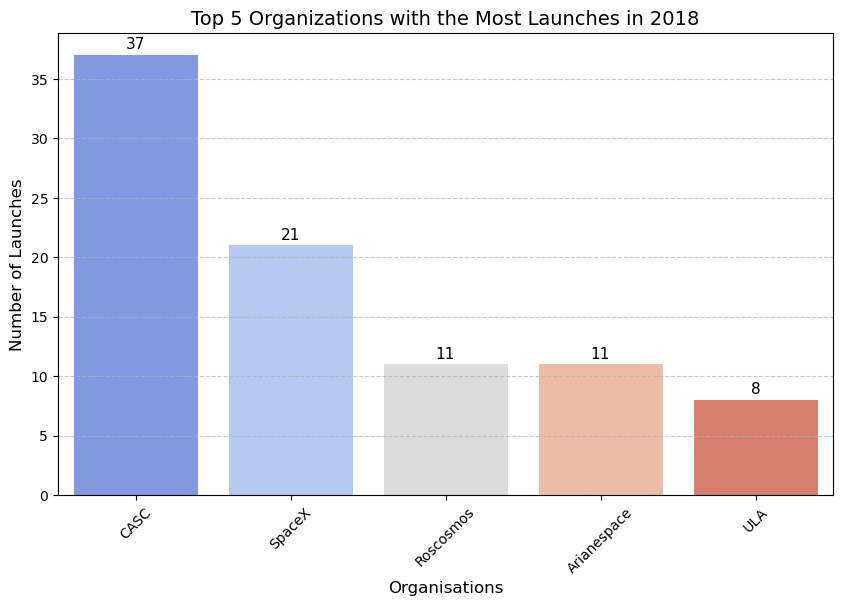

In [379]:
# Create the bar plot
plt.figure(figsize=(10, 6))
ax=sb.barplot(x=org_count_2018.index, y=org_count_2018.values, palette="coolwarm")

# Add the exact values above each bar
for i, value in enumerate(top_5_orgs_2018.values):
    ax.text(i, value + 0.5, str(value), ha='center', fontsize=11, fontweight='light')

# Add labels and title
plt.xlabel('Organisations', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Top 5 Organizations with the Most Launches in 2018', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [380]:
# The organization that launched the most space missions in 2018 was CASC, with 37 launches, followed by SpaceX, Roscosmos, Arianespace, and ULA

In [381]:
# QUESTION 2:How many launches were made per year?
# Count how many launches were made per year, sorted from highest to lowest
launches_per_year=df['Year'].value_counts()
print(launches_per_year)

Year
2018    117
1971    116
1975    112
1976    109
1977    109
       ... 
2010     36
2012     34
1958     22
1959     20
1957      3
Name: count, Length: 64, dtype: Int64


In [382]:
# Check for NaN values or non-numeric data types in the 'Year' column
print(df['Year'].isna().sum())  # Number of NaN values in the 'Year' column
print(df['Year'].dtype)  # Data type of the 'Year' column

126
Int64


In [383]:
# Convert NaN values to 0 in the 'Year' column
df['Year'].fillna(0, inplace=True)

# Verification
print(df['Year'].isna().sum())

0


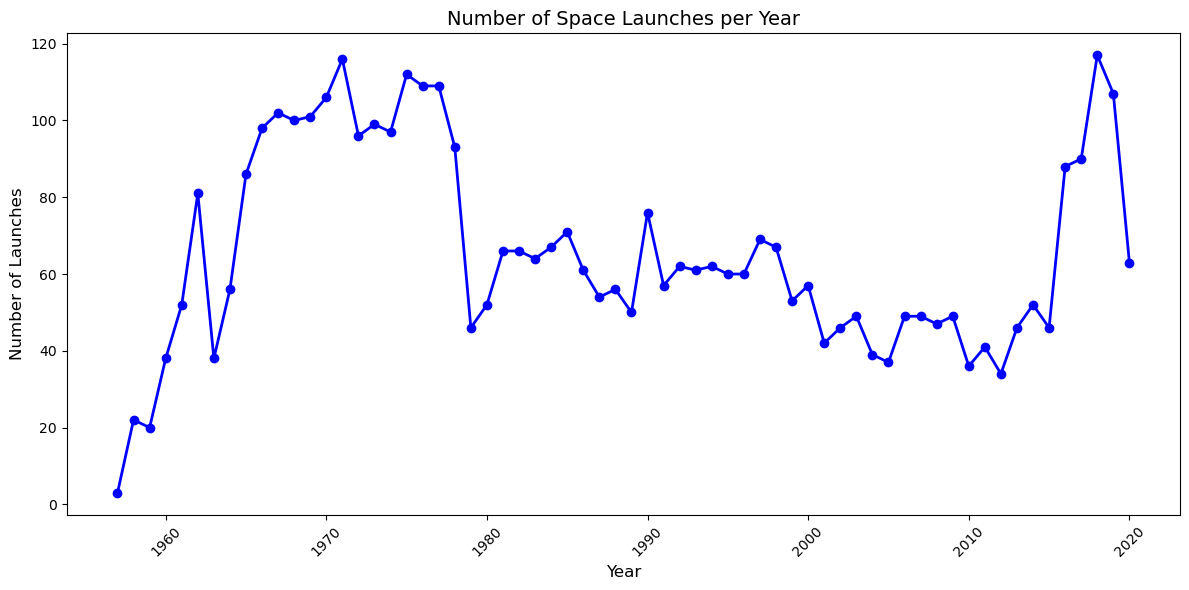

In [384]:
# Exclude 0 as it doesn't make sense in this context
# Filter the values where the year is not 0
launches_per_year = df[df['Year'] != 0]['Year'].value_counts().sort_index()

# Visualize the results with a line plot
plt.figure(figsize=(12, 6)) 
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', color='b', linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Number of Space Launches per Year', fontsize=14)

# Show the plot
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [385]:
# We want to know which are the 5 years with the most launches
# Get the top 5 years with the most launches
top_5_years = launches_per_year.nlargest(5)
print(top_5_years)

Year
2018    117
1971    116
1975    112
1976    109
1977    109
Name: count, dtype: Int64


In [386]:
# The years with the most launches were: 
# 117 launches in 2018, 116 in 1971, 112 in 1975, and 109 in 1976 and 1977

Text(0, 0.5, 'Average Price')

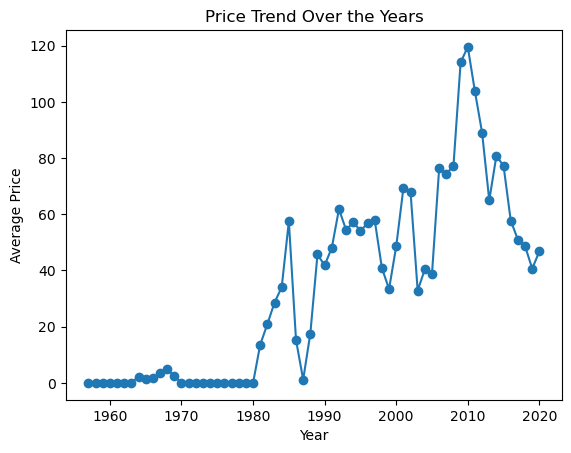

In [387]:
# QUESTION 3: How has the cost of a space mission varied over time?
# We created the graph to better visualize the trend. 
launches_per_year = df[df['Year'] != 0]['Year'].value_counts().sort_index()

# Plot the average price spent for each year
lauches_cold_war = df[df['Year']>=1900]
average_price = lauches_cold_war.groupby('Year')['Price'].mean().reset_index()

plt.plot(average_price['Year'], average_price['Price'], marker='o')
plt.title('Price Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')

In [ ]:
# The cost peaked in 2010 but then saw a steep decline, followed by an increase starting in 2020. 
# Before that, the maximum price remained relatively consistent with fluctuations. 
# This graph includes years with an average price of 0, as these correspond to years with no available data, 
# and the value of 0 was assigned to those years.

In [388]:
# QUESTION 4: What months are the most popular for launches?
# Count the number of launches per month
launches_per_month = df.groupby('Month').size() 

# Sort the months by the number of launches in descending order
launches_per_month_sorted = launches_per_month.sort_values(ascending=False) 

# Print the top 5 months with the most launches
print(launches_per_month_sorted.head()) 

Month
12    430
6     386
10    375
4     366
8     358
dtype: int64


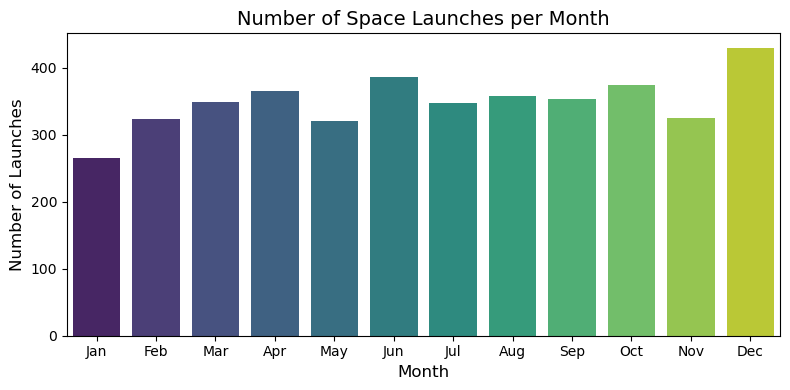

In [389]:
# Provide a graph for better understanding
# Visualize the results with a bar chart
plt.figure(figsize=(8, 4))
sb.barplot(x=launches_per_month.index, y=launches_per_month.values, palette='viridis')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.title('Number of Space Launches per Month', fontsize=14)

# Show the plot
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [390]:
# The most popular month for launches is December since there are 430 launches registered

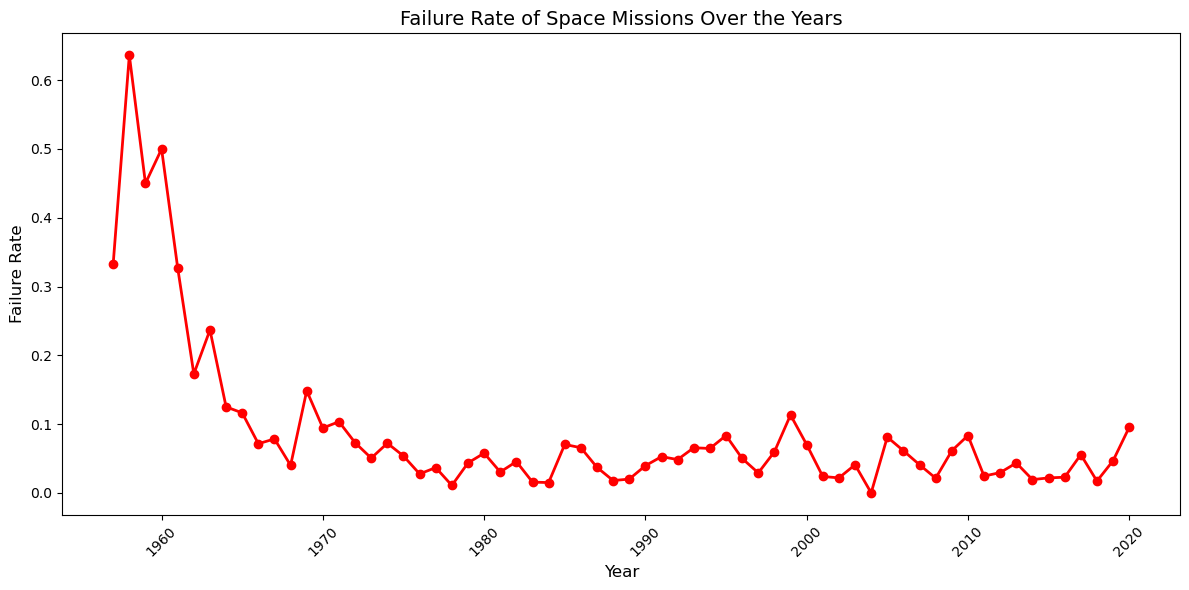

In [391]:
# QUESTION 5: Have space missions become safer, or have the chances of failure remained unchanged?

# Make sure the 'year' column is in the correct format
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Filter missions with status 'failure' and calculate the failure rate by year
df['Failure'] = df['Mission_Status'].apply(lambda x: 1 if x == 'Failure' else 0)

# Calculate the failure rate per year (average of the 'failure' column)
failure_rate_per_year = df.groupby('Year')['Failure'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(failure_rate_per_year['Year'], failure_rate_per_year['Failure'], marker='o', color='r', linewidth=2)

# Title and labels
plt.title('Failure Rate of Space Missions Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Failure Rate', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [392]:
#Missions have become safer than at the beginning, but the result still varies from year to year. 
#In the last three years, the failure rate has been increasing